# DS504 Final Project 

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 1000)

In [53]:
passenger = pd.read_csv('/Users/RiverYan/Desktop/MA4635 Final Project/train.csv')
training = pd.read_csv('/Users/RiverYan/Desktop/trained_cleaned2.csv')
testing = pd.read_csv('/Users/RiverYan/Desktop/MA4635 Final Project/test.csv')

In [4]:
passenger.drop('Unnamed: 0', inplace = True, axis=1)

In [5]:
passenger

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


## EDA 

In [6]:
passenger.shape

(25976, 24)

In [7]:
passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [8]:
passenger.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [9]:
passenger.corr()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.010211,0.095335,-0.030303,-0.002502,0.010389,0.001843,-0.006789,0.055767,0.049212,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.009884,-0.029090
Age,0.010211,1.000000,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007400
Flight Distance,0.095335,0.099409,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000131
Inflight wifi service,-0.030303,0.009242,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012277
Departure/Arrival time convenient,-0.002502,0.032449,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001345
Ease of Online booking,0.010389,0.013565,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003161
Gate location,0.001843,0.003308,0.008410,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007776
Food and drink,-0.006789,0.023841,0.057322,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.025957,-0.028309
Online boarding,0.055767,0.202058,0.214629,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.021037,-0.025875
Seat comfort,0.049212,0.154507,0.158957,0.116991,-0.001926,0.022811,-0.000721,0.580970,0.415414,1.000000,0.616817,0.124805,0.099150,0.074927,0.182469,0.067306,0.683924,-0.028341,-0.033030


<AxesSubplot:>

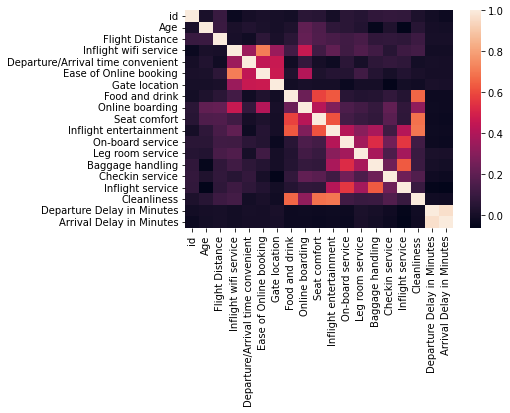

In [10]:
corr = passenger.corr()
sns.heatmap(corr)

In [103]:
training.corr()['satisfaction'].sort_values(ascending=False)

satisfaction                         1.000000
Business                             0.503944
Online boarding                      0.503447
Business travel                      0.448995
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room service                     0.313182
Cleanliness                          0.305050
Flight Distance                      0.298915
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Loyal Customer                       0.187558
Ease of Online booking               0.171507
Age                                  0.137040
Male                                 0.012356
Gate location                        0.000449
Female                              -0.012356
Departure Delay in Minutes        

In [11]:
passenger['Age'].value_counts()[:20]

39    723
25    713
40    635
41    633
43    626
44    622
45    600
27    595
23    589
48    580
22    580
37    565
49    563
46    562
42    560
47    559
24    558
38    557
36    548
52    540
Name: Age, dtype: int64

<AxesSubplot:title={'center':'Age Count'}, xlabel='Age', ylabel='Count'>

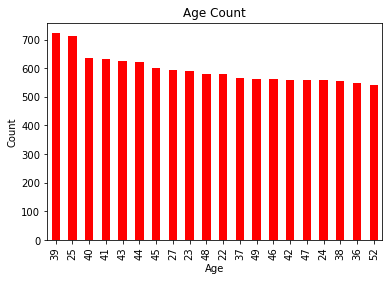

In [12]:
passenger['Age'].value_counts()[:20].plot(kind="bar", title="Age Count", color='red',
                                     xlabel="Age", ylabel="Count")

In [13]:
passenger['Flight Distance'].value_counts()[:20]

337     181
594     110
862     104
2475    101
447      95
391      95
192      91
404      88
370      88
236      87
925      84
190      83
214      81
328      79
239      79
101      78
237      78
641      76
550      76
296      75
Name: Flight Distance, dtype: int64

<AxesSubplot:title={'center':'Distance Count'}, xlabel='Distance', ylabel='Count'>

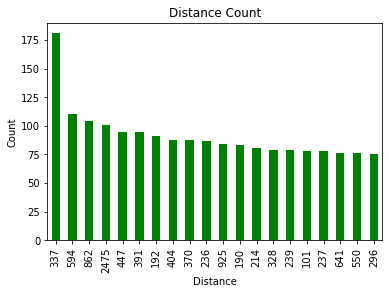

In [14]:
passenger['Flight Distance'].value_counts()[:20].plot(kind="bar", title="Distance Count", color="green",
                                                 xlabel="Distance", ylabel="Count")

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>],
       [<AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Food and drink'}>],
       [<AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>],
       [<AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>,
        <AxesSubplot:title={'center':'Inflight service'}>],
       [<AxesSubplot:title={'center':'Cleanliness'}>,
   

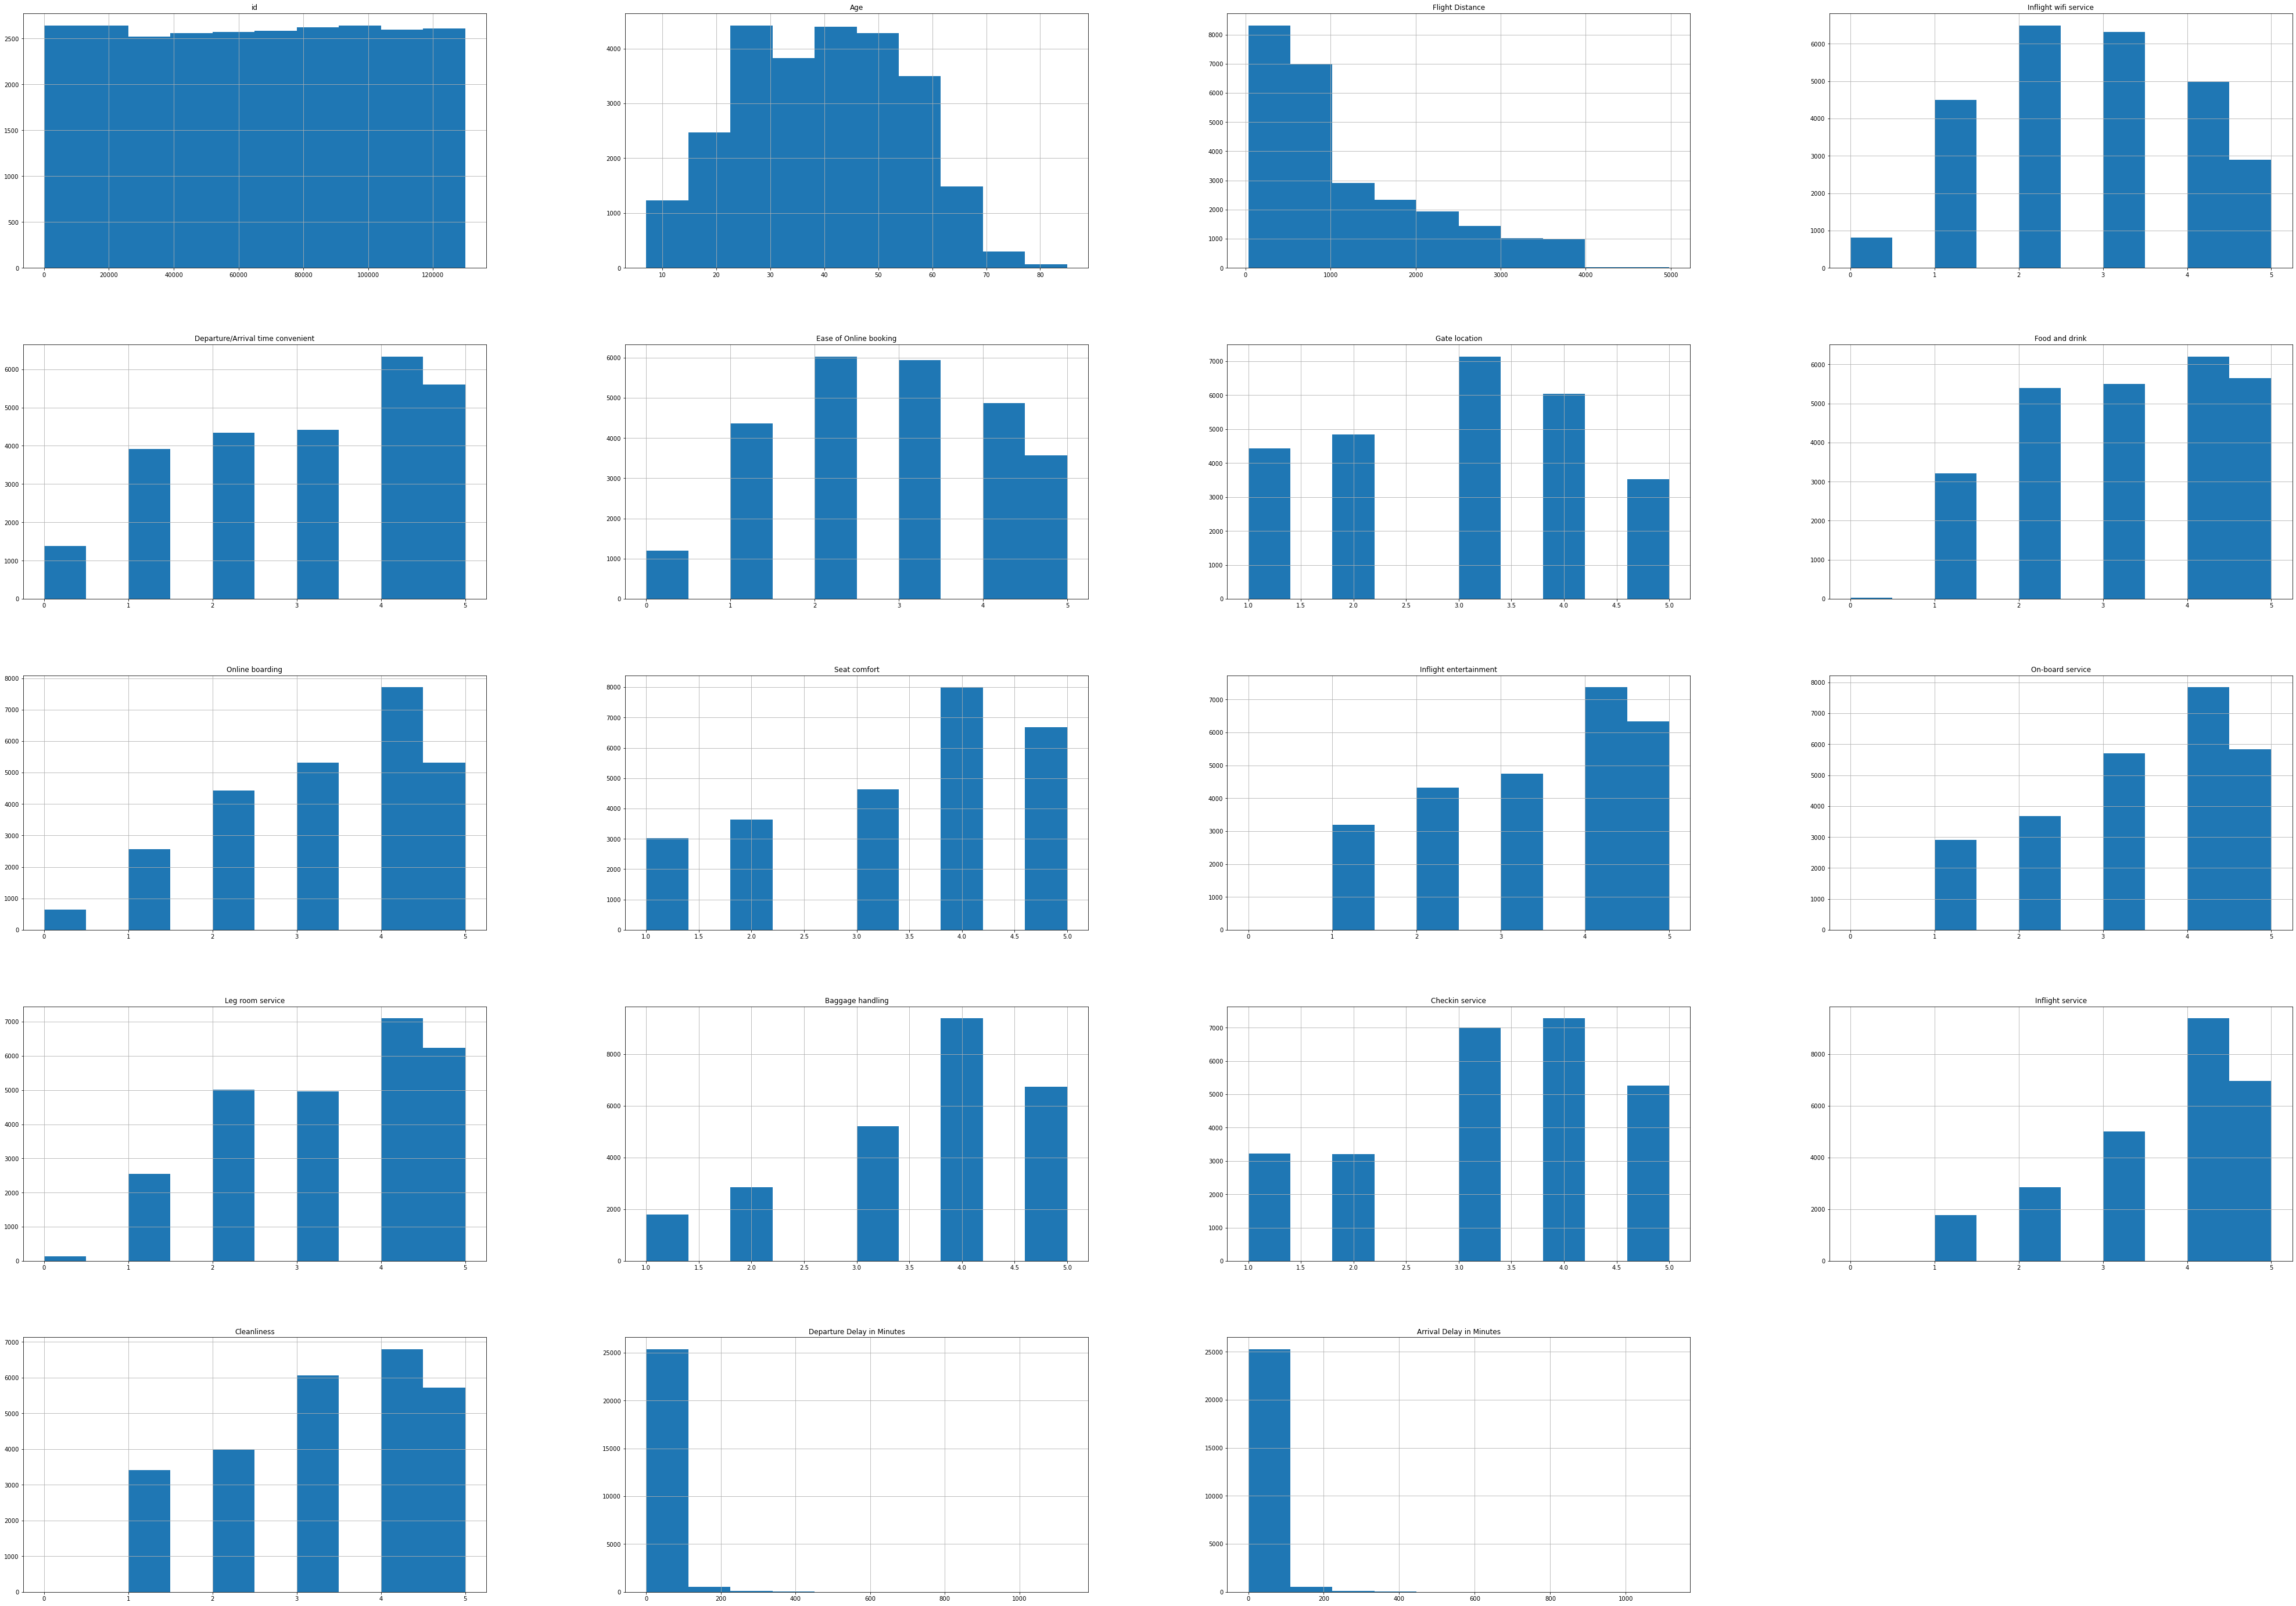

In [15]:
passenger.hist(figsize=(70, 50))

## Feature Engineering & Data Cleaning 

In [16]:
# Change Categorical to Numerical
# Clean Data 

In [17]:
passenger.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [18]:
# Replace Missing Data with Median
passenger['Arrival Delay in Minutes'].fillna(passenger['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [19]:
passenger.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [20]:
# Feature Engineering: Categorical -> Numerical
passenger['Gender'] = passenger['Gender'].replace({'Female': 0, 'Male': 1})
passenger

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,0,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,1,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,1,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,0,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,1,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,0,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,1,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [21]:
passenger['Customer Type'] = passenger['Customer Type'].replace({'disloyal Customer': 0, 
                                                                 'Loyal Customer': 1})
passenger

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,1,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,0,1,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,1,0,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,1,1,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,0,1,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,0,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,1,1,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,0,1,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,1,1,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [22]:
passenger['Type of Travel'].value_counts()

Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64

In [23]:
passenger['Type of Travel'] = passenger['Type of Travel'].replace({'Business travel': 0, 
                                                                   'Personal Travel': 1})
passenger

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,1,52,0,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,0,1,36,0,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,1,0,20,0,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,1,1,44,0,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,0,1,49,0,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,0,34,0,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,1,1,23,0,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,0,1,17,1,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,1,1,14,0,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [24]:
passenger['Class'].value_counts()

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64

In [25]:
passenger['Class'] = passenger['Class'].replace({'Business': 3, 
                                                 'Eco': 1,
                                                 'Eco Plus': 2})
passenger

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,1,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,0,1,36,0,3,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,1,0,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,1,1,44,0,3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,0,1,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,0,34,0,3,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,1,1,23,0,3,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,0,1,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,1,1,14,0,3,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [26]:
passenger['satisfaction'].value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

In [27]:
passenger['satisfaction'] = passenger['satisfaction'].replace({'neutral or dissatisfied': 0, 
                                                               'satisfied': 1})
passenger

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,1,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,90035,0,1,36,0,3,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,12360,1,0,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,77959,1,1,44,0,3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,36875,0,1,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,0,34,0,3,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
25972,71167,1,1,23,0,3,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
25973,37675,0,1,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
25974,90086,1,1,14,0,3,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


In [28]:
passenger['Total Delay Time in Minutes'] = passenger['Departure Delay in Minutes'] + passenger['Arrival Delay in Minutes']

In [29]:
passenger

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay Time in Minutes
0,19556,0,1,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1,94.0
1,90035,0,1,36,0,3,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1,0.0
2,12360,1,0,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0,0.0
3,77959,1,1,44,0,3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1,6.0
4,36875,0,1,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,0,34,0,3,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0,0.0
25972,71167,1,1,23,0,3,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1,0.0
25973,37675,0,1,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0,0.0
25974,90086,1,1,14,0,3,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1,0.0


In [30]:
# Updated Correlations with Modified Features 
passenger.corr()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay Time in Minutes
id,1.000000,-0.004371,-0.006700,0.010211,-0.006564,0.104721,0.095335,-0.030303,-0.002502,0.010389,0.001843,-0.006789,0.055767,0.049212,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.009884,-0.028862,0.010965,-0.019596
Gender,-0.004371,1.000000,0.027878,0.009261,0.019930,-0.004156,-0.005222,-0.006323,0.008417,0.001703,-0.005628,-0.014422,-0.056031,-0.047765,-0.005217,-0.000423,0.028051,0.032202,0.000079,0.034890,-0.011605,0.005775,0.005167,0.007335,0.005533
Customer Type,-0.006700,0.027878,1.000000,0.294210,0.307827,0.105309,0.229306,-0.001333,0.206864,0.012340,0.001940,0.047269,0.188418,0.143362,0.090418,0.044628,0.042757,-0.025470,0.027565,-0.025729,0.072150,-0.003200,-0.004635,0.179632,-0.003962
Age,0.010211,0.009261,0.294210,1.000000,-0.029773,0.140176,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007359,0.121697,-0.005913
Type of Travel,-0.006564,0.019930,0.307827,-0.029773,1.000000,-0.546184,-0.264559,-0.109021,0.246425,-0.136350,-0.026540,-0.091164,-0.220843,-0.140981,-0.171904,-0.072902,-0.142869,-0.039824,0.014292,-0.027235,-0.106232,-0.008003,-0.006507,-0.453268,-0.007336
Class,0.104721,-0.004156,0.105309,0.140176,-0.546184,1.000000,0.449212,0.039247,-0.078724,0.112089,0.012686,0.097572,0.322723,0.227026,0.203752,0.217525,0.210793,0.164997,0.150002,0.153875,0.149142,-0.010772,-0.015704,0.486815,-0.013389
Flight Distance,0.095335,-0.005222,0.229306,0.099409,-0.264559,0.449212,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000117,0.295292,0.001800
Inflight wifi service,-0.030303,-0.006323,-0.001333,0.009242,-0.109021,0.039247,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012553,0.280395,-0.011443
Departure/Arrival time convenient,-0.002502,0.008417,0.206864,0.032449,0.246425,-0.078724,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001442,-0.064798,-0.000850
Ease of Online booking,0.010389,0.001703,0.012340,0.013565,-0.136350,0.112089,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003371,0.157709,-0.002242


<AxesSubplot:>

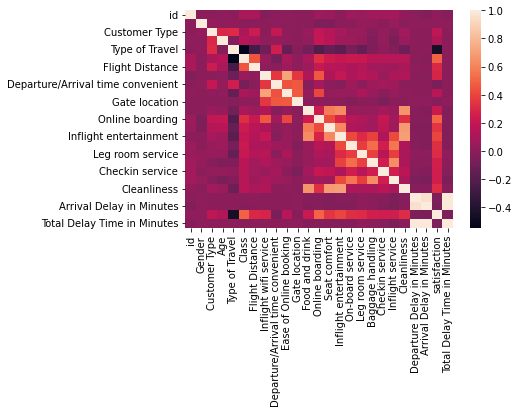

In [31]:
# Updated Correlations with Modified Features 
corr = passenger.corr()
sns.heatmap(corr)

# Models

In [32]:
training

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay Time in Minutes
0,19556,0,1,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1,94.0
1,90035,0,1,36,0,3,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1,0.0
2,12360,1,0,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0,0.0
3,77959,1,1,44,0,3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1,6.0
4,36875,0,1,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,0,34,0,3,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0,0.0
25972,71167,1,1,23,0,3,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1,0.0
25973,37675,0,1,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0,0.0
25974,90086,1,1,14,0,3,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1,0.0


In [63]:
X = training.drop(columns=['satisfaction'])
y = training['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## KNN 

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)

print(np.round(accuracy_score(y_test, y_pred), 3))

0.747


### KNN Evaluation 

In [87]:
kf = KFold(n_splits = 5)

cf_score = cross_val_score(knn, X, y, cv=kf)
 
print("Average Cross Validation Score: ", cf_score.mean())

Average Cross Validation Score:  0.7448404778235002


In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

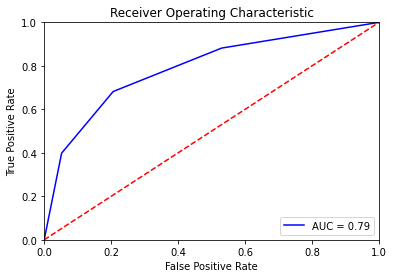

In [67]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
# Training Error
# Testing Error

Text(33.0, 0.5, 'Actual')

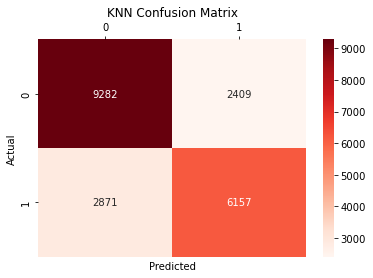

In [68]:
cf_matrix = confusion_matrix(y_test, y_pred)

heatmap = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="Reds")
heatmap.xaxis.tick_top()
heatmap.set_title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [69]:
precision = metrics.precision_score(y_test, y_pred)
print('Precision:', round(precision, 3))

recall = metrics.recall_score(y_test, y_pred)
print('Recall:', round(recall, 3))

f1_score = metrics.f1_score(y_test, y_pred)
print('F1-Score:', round(f1_score, 3))

Precision: 0.719
Recall: 0.682
F1-Score: 0.7


## MLP Classifier 

In [96]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [98]:
y_pred = mlp.predict(X_test)

print('Overall Accuracy:', round(accuracy_score(y_test, y_pred), 3))

Overall Accuracy: 0.92


In [99]:
kf = KFold(n_splits = 5)

cf_score = cross_val_score(mlp, X, y, cv=kf)
 
print("Average Cross Validation Score: ", cf_score.mean())

Average Cross Validation Score:  0.8997529801791444


Text(33.0, 0.5, 'Actual')

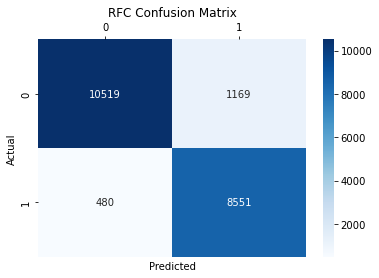

In [101]:
cf_matrix = confusion_matrix(y_test, y_pred)

heatmap = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="Blues")
heatmap.xaxis.tick_top()
heatmap.set_title('RFC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [102]:
precision = metrics.precision_score(y_test, y_pred)
print('Precision:', round(precision, 3))

recall = metrics.recall_score(y_test, y_pred)
print('Recall:', round(recall, 3))

f1_score = metrics.f1_score(y_test, y_pred)
print('F1-Score:', round(f1_score, 3))

Precision: 0.88
Recall: 0.947
F1-Score: 0.912


## Random Forest Classifier 

In [88]:
rfc = RandomForestClassifier(max_depth=4, n_estimators=100)
rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Overall Accuracy:', round(accuracy_score(y_test, y_pred), 3))

Overall Accuracy: 0.911


Text(33.0, 0.5, 'Actual')

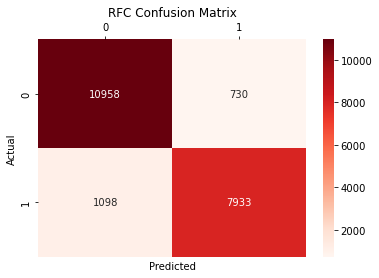

In [81]:
cf_matrix = confusion_matrix(y_test, y_pred)

heatmap = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="Reds")
heatmap.xaxis.tick_top()
heatmap.set_title('RFC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [89]:
kf = KFold(n_splits = 5)

cf_score = cross_val_score(rfc, X, y, cv=kf)
 
print("Average Cross Validation Score: ", cf_score.mean())

Average Cross Validation Score:  0.9070506399298907


In [45]:
precision = metrics.precision_score(y_test, y_pred)
print('Precision:', round(precision, 3))

recall = metrics.recall_score(y_test, y_pred)
print('Recall:', round(recall, 3))

f1_score = metrics.f1_score(y_test, y_pred)
print('F1-Score:', round(f1_score, 3))

Precision: 0.923
Recall: 0.855
F1-Score: 0.888


In [46]:
# Feature Importances 
importances = rfc.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

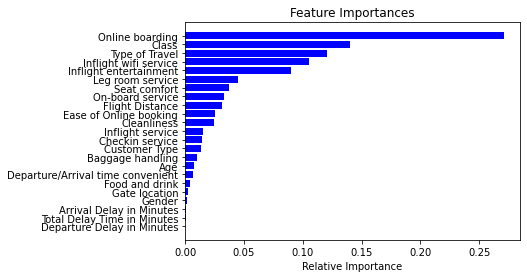

In [47]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Naive Bayes

In [90]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

naiveb = GaussianNB()
naiveb = naiveb.fit(X_train, y_train)
y_pred = naiveb.predict(X_test)

print('Overall Accuracy:', round(accuracy_score(y_test, y_pred), 3))

Overall Accuracy: 0.85


In [91]:
kf = KFold(n_splits = 5)

cf_score = cross_val_score(naiveb, X, y, cv=kf)
 
print("Average Cross Validation Score: ", cf_score.mean())

Average Cross Validation Score:  0.8487557648608404


Text(33.0, 0.5, 'Actual')

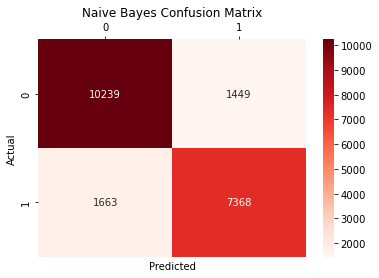

In [83]:
cf_matrix = confusion_matrix(y_test, y_pred)

heatmap = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="Reds")
heatmap.xaxis.tick_top()
heatmap.set_title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [84]:
precision = metrics.precision_score(y_test, y_pred)
print('Precision:', round(precision, 3))

recall = metrics.recall_score(y_test, y_pred)
print('Recall:', round(recall, 3))

f1_score = metrics.f1_score(y_test, y_pred)
print('F1-Score:', round(f1_score, 3))

Precision: 0.836
Recall: 0.816
F1-Score: 0.826


# Logistic Regression

In [71]:
X = training.drop(columns=['satisfaction'])
y = training['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
# Default Max_Iter = 100
LogReg = LogisticRegression()
model = LogReg.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(np.round(accuracy_score(y_test, y_pred), 3))

0.82


/Users/riveryan/opt/anaconda3/envs/py3k/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
kf = KFold(n_splits = 5)

cf_score = cross_val_score(model, X, y, cv=kf)
 
print("Average Cross Validation Score: ", cf_score.mean())

/Users/riveryan/opt/anaconda3/envs/py3k/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/riveryan/opt/anaconda3/envs/py3k/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Average Cross Validation Score:  0.8147093833058344


/Users/riveryan/opt/anaconda3/envs/py3k/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(33.0, 0.5, 'Actual')

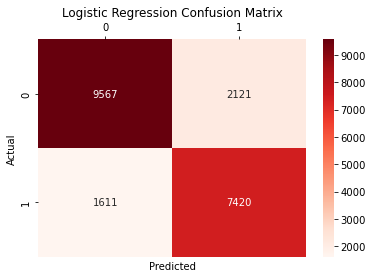

In [73]:
cf_matrix = confusion_matrix(y_test, y_pred)

heatmap = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap="Reds")
heatmap.xaxis.tick_top()
heatmap.set_title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [74]:
precision = metrics.precision_score(y_test, y_pred)
print('Precision:', round(precision, 3))

recall = metrics.recall_score(y_test, y_pred)
print('Recall:', round(recall, 3))

f1_score = metrics.f1_score(y_test, y_pred)
print('F1-Score:', round(f1_score, 3))

Precision: 0.778
Recall: 0.822
F1-Score: 0.799


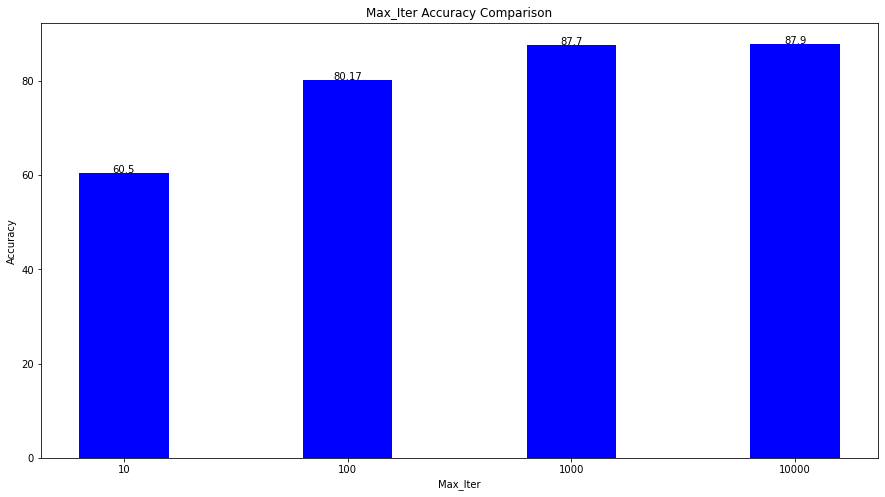

In [85]:
# Graph the validation set accuracies of each of the three models

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

data = {'10':60.5, '100':80.17, '1000':87.7, '10000':87.9}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (15, 8))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)

addlabels(courses, values)
 
plt.xlabel("Max_Iter")
plt.ylabel("Accuracy")
plt.title("Max_Iter Accuracy Comparison")
plt.show()